# EDA

This is the notebook making eda about the en_wiki lightdump data, to see the full result of eda on every csvs download, use "python run.py eda" and find the results at the "result/eda" folder

## IMPORTANT NOTICE

1. This eda is written at the root directory, do not directly run the notebook at the location where it is and please move it to root directory after downloading the data
2. This notebook is written in a random sequences, which means every section in this notebook (except conclusion) is generally independent with each other. Although I will mentionn some other sections and make some comparision

In [1]:
import matplotlib.pyplot as plt

In [2]:
import os
import gc
import requests
from bs4 import BeautifulSoup
import pandas as pd
import zipfile
import re
import time

In [3]:
from etl import *

Helper functions:

In [4]:
def add_dicts(dict1, dict2):
    result={}
    if len(dict1.keys())==0:
        return dict2
    elif len(dict2.keys())==0:
        return dict1
    else:
        for key in dict1.keys():
            if key in dict2.keys():
                result[key]=dict1[key]+dict2[key]
            else:
                result[key]=dict1[key]
        for key2 in dict2.keys():
            if key2 not in result.keys():
                result[key2]=dict2[key2]
        return result
                

In [5]:
def get_csvs_route(road):
    result=[]
    for filename in os.listdir(road):
        fileroute=os.path.join(road,filename)
        result.append(fileroute)
    return result

### Section 1 Robots

Get the frequency of robots edit and reversion

In [6]:
def bots_raw_dict(road):
    total_freq={}
    revert_freq={}
    for csvname in os.listdir(road):
        csvroute=os.path.join(road, csvname)
        csvdict={}
        df=pd.read_csv(csvroute)
        df['user']=df['user'].str.lower()
        df['revert']=df['revert'].astype('int')
        dfrevert=df[df['revert']==1]
        bots=df[df['user'].str.contains('bot')]
        reverts=bots[bots['revert']==1]
        thef=bots['user'].value_counts().to_dict()
        ther=reverts['user'].value_counts().to_dict()
        total_freq=add_dicts(total_freq, thef)
        revert_freq=add_dicts(revert_freq, ther)
        print('finish dict csv', csvname, len(total_freq))
        del thef, ther
        del [[df, bots, reverts, dfrevert]]
        gc.collect()
        df=pd.DataFrame()
        bots=pd.DataFrame()
        reverts=pd.DataFrame()
        thef={}
        ther={}
        dfrevert=pd.DataFrame()
    return total_freq, revert_freq

In [6]:
total_freq, revert_freq=bots_raw_dict('data/csvs/en_wiki')

finish dict csv en_wiki_13.csv 781
finish dict csv en_wiki_14.csv 1037
finish dict csv en_wiki_21.csv 1230
finish dict csv en_wiki_26.csv 1425
finish dict csv en_wiki_28.csv 1608
finish dict csv en_wiki_1.csv 1761
finish dict csv en_wiki_42.csv 1946
finish dict csv en_wiki_39.csv 2090
finish dict csv en_wiki_6.csv 2212
finish dict csv en_wiki_37.csv 2311
finish dict csv en_wiki_8.csv 2432
finish dict csv en_wiki_30.csv 2548
finish dict csv en_wiki_29.csv 2645
finish dict csv en_wiki_27.csv 2713
finish dict csv en_wiki_20.csv 2811
finish dict csv en_wiki_15.csv 2912
finish dict csv en_wiki_12.csv 2997
finish dict csv en_wiki_31.csv 3091
finish dict csv en_wiki_36.csv 3174
finish dict csv en_wiki_9.csv 3251
finish dict csv en_wiki_38.csv 3361
finish dict csv en_wiki_7.csv 3429
finish dict csv en_wiki_44.csv 3504
finish dict csv en_wiki_43.csv 3598
finish dict csv en_wiki_35.csv 3652
finish dict csv en_wiki_32.csv 3710
finish dict csv en_wiki_3.csv 3773
finish dict csv en_wiki_40.csv 3839

In [9]:
total_f=pd.Series(total_freq)

In [10]:
total_f.describe()

count    4.873000e+03
mean     3.389500e+03
std      4.717530e+04
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.100000e+01
max      2.695952e+06
dtype: float64

The table above shows the description of robot edit times, which indicate how skewed this dataset is, with 75% perncentile at 11 while the max edit time at 2695952

In [11]:
total_f.sort_values(ascending=False).head(20)

smackbot                   2695952
cydebot                     763366
cluebot                     644069
lightbot                    638751
russbot                     606590
the_anomebot2               536912
thijs!bot                   418576
alaibot                     379167
full-date_unlinking_bot     322808
bluebot                     320537
siebot                      291204
botijo                      289988
yurikbot                    272996
xqbot                       261936
cmdrobot                    234560
erik9bot                    233001
txikibot                    223028
flabot                      212084
dumzibot                    208023
volkovbot                   207434
dtype: int64

This is the robots with most edit times (top20), but many of them are not top 20 robots with reversion.

Text(0.5, 1.0, 'plot for edit times of bots')

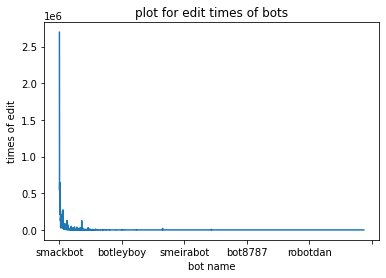

In [42]:
#make plot of bots edit
total_f.plot()
plt.xlabel('bot name')
plt.ylabel('times of edit')
plt.title('plot for edit times of bots')

This shape of skewed graph will appears many times in this notebook, which tells us that we should focus on tails

In [12]:
total_r=pd.Series(revert_freq)

In [14]:
total_r.describe()

count      1237.000000
mean       1180.736459
std       19732.676887
min           1.000000
25%           1.000000
50%           2.000000
75%          14.000000
max      643853.000000
dtype: float64

Table about bots revert time description for those bots who made reversion

In [13]:
total_r.sort_values(ascending=False).head(20)

cluebot                643853
antivandalbot          141364
voabot_ii              134472
xlinkbot               103205
martinbot              100789
tawkerbot2              69941
pseudobot               48919
russbot                 25174
xqbot                   19643
antispambot             19338
darknessbot             13990
tawkerbot4              13533
soxbot_iii              12911
cydebot                  9175
dashbot                  8093
countervandalismbot      7379
タチコマ_robot               5775
dumbbot                  4776
scepbot                  4301
robotman1974             2733
dtype: int64

Top 20 bots with reversion. Note that there are some bots with irregular names which can be very annoying when dealing with those kind of data.

Text(0.5, 1.0, 'plot of reversion times for bots')

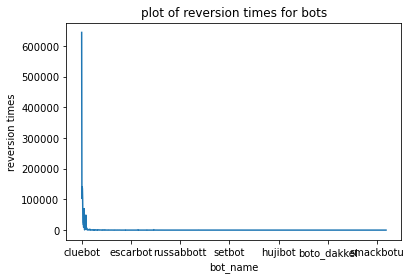

In [41]:
#make plot about revert time of bots
total_r.plot()
plt.xlabel('bot_name')
plt.ylabel('reversion times')
plt.title('plot of reversion times for bots')

In [23]:
combined_bots=pd.concat([total_f, total_r], axis=1)
combined_bots=combined_bots.fillna(0)
combined_bots.columns=['edit_frequency', 'revert_frequency']
combined_bots.head(10)

,edit_frequency,revert_frequency
smackbot,2695952,2727.0
cydebot,763366,9175.0
russbot,606590,25174.0
the_anomebot2,536912,437.0
lightbot,638751,398.0
thijs!bot,418576,1290.0
alaibot,379167,1098.0
full-date_unlinking_bot,322808,65.0
siebot,291204,1717.0
bluebot,320537,706.0


In [25]:
#get revet/edit ratio
combined_bots['revert_vs_edit_ratio']=combined_bots['revert_frequency']/combined_bots['edit_frequency']
combined_bots['revert_vs_edit_ratio'].describe()

count    4873.000000
mean        0.063933
std         0.200478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000332
max         1.000000
Name: revert_vs_edit_ratio, dtype: float64

The revert vs edit ratio of bots. Looks like most of bots are peace-lovers while some other bots are made for reversion.

Text(0.5, 1.0, 'histogram of revert vs edit ratio')

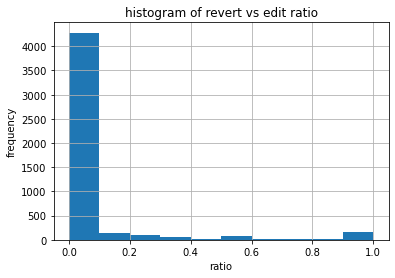

In [40]:
combined_bots['revert_vs_edit_ratio'].hist()
plt.xlabel('ratio')
plt.ylabel('frequency')
plt.title('histogram of revert vs edit ratio')

Histogram of revert/edit ratio, a more clear visualization of conclusion made by the table above.

### Section 2 Users

In [7]:
def user_raw_dict(road):
    total_freq={}
    revert_freq={}
    for csvname in os.listdir(road):
        csvroute=os.path.join(road, csvname)
        csvdict={}
        df=pd.read_csv(csvroute)
        df['revert']=df['revert'].astype('int')
        reverts=df[df['revert']==1]
        thef=df['user'].value_counts().to_dict()
        ther=reverts['user'].value_counts().to_dict()
        total_freq=add_dicts(total_freq, thef)
        revert_freq=add_dicts(revert_freq, ther)
        print('finish dict csv', csvname, len(total_freq))
        del thef, ther
        del [[df, reverts]]
        gc.collect()
        df=pd.DataFrame()
        reverts=pd.DataFrame()
        thef={}
        ther={}
    return total_freq, revert_freq

In [8]:
user_edit,user_revert=user_raw_dict('data/csvs/en_wiki')

finish dict csv en_wiki_13.csv 855530
finish dict csv en_wiki_14.csv 1577078
finish dict csv en_wiki_21.csv 2363298
finish dict csv en_wiki_26.csv 3124394
finish dict csv en_wiki_28.csv 3862676
finish dict csv en_wiki_1.csv 4255704
finish dict csv en_wiki_42.csv 5112855
finish dict csv en_wiki_39.csv 5830756
finish dict csv en_wiki_6.csv 6233712
finish dict csv en_wiki_37.csv 6933172
finish dict csv en_wiki_8.csv 7360302
finish dict csv en_wiki_30.csv 7957724
finish dict csv en_wiki_29.csv 8511945
finish dict csv en_wiki_27.csv 9042362
finish dict csv en_wiki_20.csv 9535546
finish dict csv en_wiki_15.csv 9988439
finish dict csv en_wiki_12.csv 10393546
finish dict csv en_wiki_31.csv 10920323
finish dict csv en_wiki_36.csv 11472583
finish dict csv en_wiki_9.csv 11849470
finish dict csv en_wiki_38.csv 12345611
finish dict csv en_wiki_7.csv 12657515
finish dict csv en_wiki_44.csv 13221377
finish dict csv en_wiki_43.csv 13790687
finish dict csv en_wiki_35.csv 14294245
finish dict csv en_wik

In [9]:
user_e=pd.Series(user_edit)
user_r=pd.Series(user_revert)

In [34]:
user_e.describe()

count    2.119131e+07
mean     1.037460e+01
std      7.964880e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.695617e+06
dtype: float64

The table about the description of user edit times. Still, the edit number is heavily skewed.

In [35]:
user_r.describe()

count    2.333106e+06
mean     9.548600e+00
std      5.206152e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.438530e+05
dtype: float64

The table about the description of user revert times for those users who made reversion, and this time the reversion looks a little more peaceful compared with the reversion by bots

In [11]:
user_e.sort_values(ascending=False, inplace=True)

In [12]:
user_r.sort_values(ascending=False, inplace=True)

In [13]:
user_e.head(10)

SmackBot           2695617
Cydebot             763366
ClueBot             644069
Lightbot            638751
RussBot             606590
The_Anomebot2       536912
Rich_Farmbrough     522440
Thijs!bot           418576
Rjwilmsi            387681
Alaibot             379167
dtype: int64

Top 10 users with most edit. Most of them are obviously bots

In [14]:
user_r.head(10)

ClueBot                           643853
AntiVandalBot                     141364
J.delanoy                         135451
VoABot_II                         134472
XLinkBot                          103205
Alansohn                          102157
MartinBot                         100789
Tawkerbot2                         69941
Epbr123                            68492
Can't_sleep,_clown_will_eat_me     65955
dtype: int64

Top 10 users with reversion. The bots still play an important role here.

Text(0.5, 1.0, 'histogram of user edit')

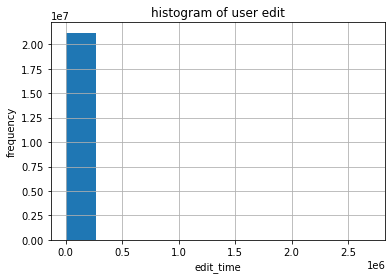

In [15]:
user_e.hist()
plt.xlabel('edit_time')
plt.ylabel('frequency')
plt.title('histogram of user edit')

User edit histogram. There are so many users with 1 edit that the graph looks really weird.

Text(0.5, 1.0, 'histogram of user revert')

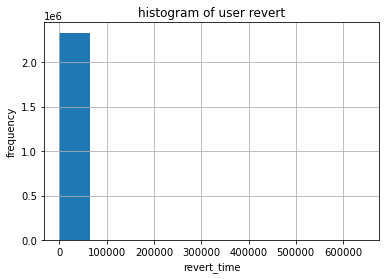

In [16]:
user_r.hist()
plt.xlabel('revert_time')
plt.ylabel('frequency')
plt.title('histogram of user revert')

The same thing happened on user reversion histogram

Those two plots are similar with the histogram in shape, but they are telling a different story. They shows how user edit time vary severely with huge differences between users

Text(0.5, 1.0, 'plot of user edit time')

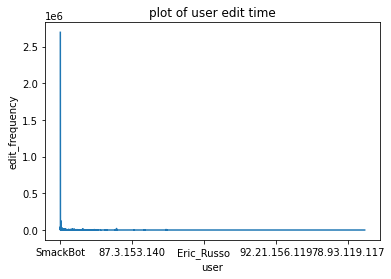

In [39]:
user_e.plot()
plt.xlabel('user')
plt.ylabel("edit_frequency")
plt.title('plot of user edit time')

Text(0.5, 1.0, 'plot of user revert time')

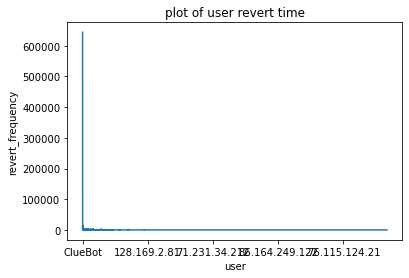

In [43]:
user_r.plot()
plt.xlabel('user')
plt.ylabel('revert_frequency')
plt.title('plot of user revert time')

Calculating uer revert/edit ratio

In [10]:
combined_user=pd.concat([user_e,user_r], axis=1)
combined_user.columns=['user_edit', 'user_revert']
combined_user=combined_user.fillna(0)
combined_user['revert_vs_edit_ratio']=combined_user['user_revert']/combined_user['user_edit']
combined_user['revert_vs_edit_ratio'].describe()

count    2.119131e+07
mean     4.372522e-02
std      1.654792e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: revert_vs_edit_ratio, dtype: float64

Generally, users are more peaceful than bots along, since 75% of them only makes edit and no reversion. The histogram below shows a better visualization of the data

Text(0.5, 1.0, 'histogram of revert vs edit ratio')

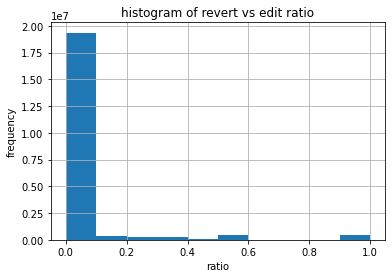

In [11]:
combined_user['revert_vs_edit_ratio'].hist()
plt.xlabel('ratio')
plt.ylabel('frequency')
plt.title('histogram of revert vs edit ratio')

### Section 3 article

In [8]:
def article_raw_dict(road):
    total_freq={}
    revert_freq={}
    for csvname in os.listdir(road):
        csvroute=os.path.join(road, csvname)
        csvdict={}
        df=pd.read_csv(csvroute)
        df['revert']=df['revert'].astype('int')
        reverts=df[df['revert']==1]
        thef=df['article'].value_counts().to_dict()
        ther=reverts['article'].value_counts().to_dict()
        total_freq=add_dicts(total_freq, thef)
        revert_freq=add_dicts(revert_freq, ther)
        print('finish dict csv', csvname, len(total_freq))
        del thef, ther
        del [[df, reverts]]
        gc.collect()
        df=pd.DataFrame()
        reverts=pd.DataFrame()
        thef={}
        ther={}
    return total_freq, revert_freq

In [8]:
article_edit, article_revert=article_raw_dict('data/csvs/en_wiki')

finish dict csv en_wiki_13.csv 143749
finish dict csv en_wiki_14.csv 280563
finish dict csv en_wiki_21.csv 369159
finish dict csv en_wiki_26.csv 436513
finish dict csv en_wiki_28.csv 489965
finish dict csv en_wiki_1.csv 853829
finish dict csv en_wiki_42.csv 860641
finish dict csv en_wiki_39.csv 880436
finish dict csv en_wiki_6.csv 1117734
finish dict csv en_wiki_37.csv 1136178
finish dict csv en_wiki_8.csv 1329572
finish dict csv en_wiki_30.csv 1376066
finish dict csv en_wiki_29.csv 1432868
finish dict csv en_wiki_27.csv 1493265
finish dict csv en_wiki_20.csv 1589220
finish dict csv en_wiki_15.csv 1708427
finish dict csv en_wiki_12.csv 1859087
finish dict csv en_wiki_31.csv 1906032
finish dict csv en_wiki_36.csv 1930126
finish dict csv en_wiki_9.csv 2104001
finish dict csv en_wiki_38.csv 2146542
finish dict csv en_wiki_7.csv 2380500
finish dict csv en_wiki_44.csv 2387132
finish dict csv en_wiki_43.csv 2393888
finish dict csv en_wiki_35.csv 2421556
finish dict csv en_wiki_32.csv 2460650

In [9]:
article_e=pd.Series(article_edit)
article_r=pd.Series(article_revert)
combined_article=pd.concat([article_e,article_r], axis=1)
combined_article=combined_article.fillna(0)

In [11]:
combined_article.columns=['article_edit', 'article_revert']
combined_article['revert_edit_ratio']=combined_article['article_revert']/combined_article['article_edit']

In [12]:
combined_article['article_edit'].describe()

count    4.644458e+06
mean     4.733616e+01
std      2.175524e+02
min      2.000000e+00
25%      3.000000e+00
50%      1.100000e+01
75%      3.100000e+01
max      4.365000e+04
Name: article_edit, dtype: float64

This table is the description of article edit time. Looks like all articles experience at least 2 edit.

In [17]:
combined_article['article_revert'].describe()

count    4.644458e+06
mean     4.796642e+00
std      4.395998e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.508100e+04
Name: article_revert, dtype: float64

This table describes the reversion per article and most of them are going well with no reverts while some of the controversial articles (like George Bush) are experiencing great edit wars here.

In [18]:
combined_article['revert_edit_ratio'].describe()

count    4.644458e+06
mean     4.328443e-02
std      7.863970e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.091371e-02
max      9.411765e-01
Name: revert_edit_ratio, dtype: float64

The description of revert/edit data per article indicates that there are not many articles with controversy. However, there is article with 94% reversion rate which makes me wonder what they are reverting and this article is a heat battlefield even if the edit time is low.

Those two plots below indicates that usually the article with more edits will receive more reversion

Text(0.5, 1.0, 'plot of article edit times')

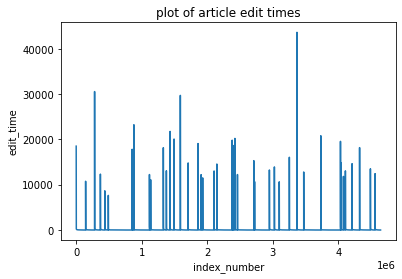

In [15]:
combined_article=combined_article.reset_index()
combined_article['article_edit'].plot()
plt.xlabel('index_number')
plt.ylabel('edit_time')
plt.title('plot of article edit times')

Text(0.5, 1.0, 'plot of article revert times')

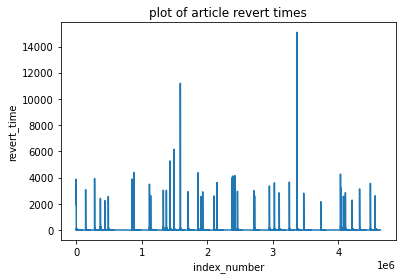

In [16]:
combined_article['article_revert'].plot()
plt.xlabel('index_number')
plt.ylabel('revert_time')
plt.title('plot of article revert times')

This histogram is another similar histogram with majority of ratio at 0.

Text(0.5, 1.0, 'histogram of article revert_edit_ratio')

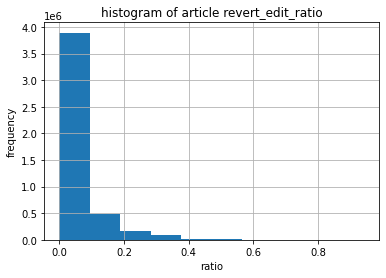

In [20]:
combined_article['revert_edit_ratio'].hist()
plt.xlabel('ratio')
plt.ylabel('frequency')
plt.title('histogram of article revert_edit_ratio')

### Section 4 Daily

In [9]:
def day_raw_dict(road):
    total_freq={}
    revert_freq={}
    for csvname in os.listdir(road):
        csvroute=os.path.join(road, csvname)
        csvdict={}
        df=pd.read_csv(csvroute)
        df['revert']=df['revert'].astype('int')
        df['time']=pd.to_datetime(df['time'])
        df['time']=df['time'].dt.floor('D')
        reverts=df[df['revert']==1]
        thef=df['time'].value_counts().to_dict()
        ther=reverts['time'].value_counts().to_dict()
        total_freq=add_dicts(total_freq, thef)
        revert_freq=add_dicts(revert_freq, ther)
        print('finish dict csv', csvname, len(total_freq))
        del thef, ther
        del [[df, reverts]]
        gc.collect()
        df=pd.DataFrame()
        reverts=pd.DataFrame()
        thef={}
        ther={}
    return total_freq, revert_freq

In [10]:
day_edit, day_revert=day_raw_dict('data/csvs/en_wiki')

finish dict csv en_wiki_13.csv 2748
finish dict csv en_wiki_14.csv 2870
finish dict csv en_wiki_21.csv 2936
finish dict csv en_wiki_26.csv 2949
finish dict csv en_wiki_28.csv 2971
finish dict csv en_wiki_1.csv 3157
finish dict csv en_wiki_42.csv 3295
finish dict csv en_wiki_39.csv 3295
finish dict csv en_wiki_6.csv 3295
finish dict csv en_wiki_37.csv 3295
finish dict csv en_wiki_8.csv 3295
finish dict csv en_wiki_30.csv 3295
finish dict csv en_wiki_29.csv 3295
finish dict csv en_wiki_27.csv 3295
finish dict csv en_wiki_20.csv 3295
finish dict csv en_wiki_15.csv 3295
finish dict csv en_wiki_12.csv 3295
finish dict csv en_wiki_31.csv 3295
finish dict csv en_wiki_36.csv 3295
finish dict csv en_wiki_9.csv 3296
finish dict csv en_wiki_38.csv 3296
finish dict csv en_wiki_7.csv 3296
finish dict csv en_wiki_44.csv 3299
finish dict csv en_wiki_43.csv 3302
finish dict csv en_wiki_35.csv 3302
finish dict csv en_wiki_32.csv 3302
finish dict csv en_wiki_3.csv 3302
finish dict csv en_wiki_40.csv 330

In [12]:
day_e=pd.Series(day_edit)
day_r=pd.Series(day_revert)
combined_day=pd.concat([day_e, day_r], axis=1)
combined_day=combined_day.fillna(0)
combined_day.columns=['daily_edit', 'daily_revert']
combined_day['daily_revert_edit_ratio']=combined_day['daily_revert']/combined_day['daily_edit']
combined_day=combined_day.sort_index()
combined_day.head(10)

,daily_edit,daily_revert,daily_revert_edit_ratio
2001-01-16 00:00:00+00:00,1,0.0,0.0
2001-01-17 00:00:00+00:00,5,0.0,0.0
2001-01-18 00:00:00+00:00,2,0.0,0.0
2001-01-19 00:00:00+00:00,7,0.0,0.0
2001-01-20 00:00:00+00:00,6,0.0,0.0
2001-01-21 00:00:00+00:00,18,0.0,0.0
2001-01-22 00:00:00+00:00,5,0.0,0.0
2001-01-23 00:00:00+00:00,10,0.0,0.0
2001-01-24 00:00:00+00:00,4,0.0,0.0
2001-01-25 00:00:00+00:00,10,0.0,0.0


In [15]:
combined_day['daily_edit'].describe()

count      3303.000000
mean      66561.087496
std       62589.939336
min           1.000000
25%        2835.500000
50%       44372.000000
75%      132099.000000
max      218485.000000
Name: daily_edit, dtype: float64

The description table of daily edit. In 3303 day, there is day with 1 edit while the max edit is at 218485 edit per day. The daily edit is not as skewed as the previous sections

In [16]:
combined_day['daily_revert'].describe()

count     3303.000000
mean      6744.745686
std       7193.217115
min          0.000000
25%         68.000000
50%       2925.000000
75%      13202.500000
max      22191.000000
Name: daily_revert, dtype: float64

Daily revert description. EN_wiki has some peaceful day and we can find that there are articles with multiple days of battle since those articles have a revert time that is larger than the daily max revert time

In [17]:
combined_day['daily_revert_edit_ratio'].describe()

count    3303.000000
mean        0.065263
std         0.042087
min         0.000000
25%         0.027679
50%         0.066481
75%         0.101164
max         0.197917
Name: daily_revert_edit_ratio, dtype: float64

The revert/edit ration in en_wiki every day is low, and looks like the community is staying in a good collaboration envirnoment.

Those two plots below shows that how en_wiki grows fast from 2001~2007 and then almost stop growing since 2007.

Text(0.5, 1.0, 'daily_edit')

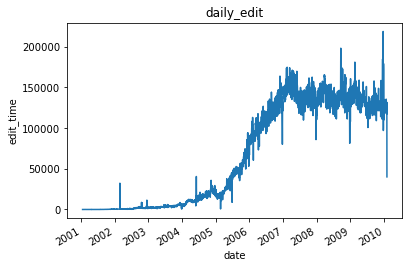

In [13]:
combined_day['daily_edit'].plot()
plt.xlabel('date')
plt.ylabel('edit_time')
plt.title('daily_edit')

Text(0.5, 1.0, 'daily_revert')

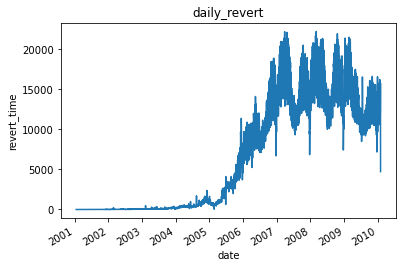

In [18]:
combined_day['daily_revert'].plot()
plt.xlabel('date')
plt.ylabel('revert_time')
plt.title('daily_revert')

The daily revert/edit ration shows that the early days of en_wiki have some irregular large battles there. I think this happens because the community rules about edit war are not sound at that time.

Text(0.5, 1.0, 'daily_revert_edit_ratio')

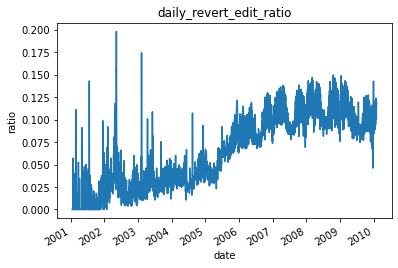

In [19]:
combined_day['daily_revert_edit_ratio'].plot()
plt.xlabel('date')
plt.ylabel('ratio')
plt.title('daily_revert_edit_ratio')

## Conclusion

The en wikipeda data show that this dataset is heavily skewed and we should focus on the tails where the battles happen. However, this does not mean that we should ignore the data with 0 revert as they serve as the background of our research. We are studying conflicts in a background of collaboration. Addtionally, the daily data indicate that better community rules may help community to reduce the conflicts happened. Also, we only have data that from 2001~2010, but as Wikipedia is staying stable since 2007, I think it is ok to use only this period of data. The user-bot comparision gives us a hint that since bots are more aggresive than general users, will the bots be the main source of conflicts in the future of the Wikipedia?